In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


In [2]:
data = pd.read_csv("./911_Calls_for_Service.csv")

In [3]:
data.head()

,callDateTime,priority,district,description,callNumber,incidentLocation,location
0,07/13/2015 10:41:00 AM,Medium,CD,SEE TEXT,P151941002,0 N CALVERT ST,"(39.2899299,-76.6123462)"
1,07/13/2015 10:47:00 AM,Medium,CD,911/NO VOICE,P151941003,600 E FAYETTE ST,"(39.2906737,-76.6071600)"
2,07/13/2015 10:42:00 AM,Medium,CD,911/NO VOICE,P151941004,200 E BALTIMORE ST,"(39.2898910,-76.6120720)"
3,07/13/2015 10:45:00 AM,Low,CD,PRKG COMPLAINT,P151941005,800 PARK AV,"(39.2985163,-76.6184754)"
4,07/13/2015 10:46:00 AM,Medium,SW,AUTO THEFT,P151941006,3500 CLIFTON AV,"(39.3112130,-76.6763150)"


In [5]:
data["callDateTime"][0]

'07/13/2015 10:41:00 AM'

In [6]:
s = data["callDateTime"][0]
def getWeekday(s):
    datetime_object = datetime.datetime.strptime(s, '%m/%d/%Y %I:%M:%S %p')
    return datetime_object.weekday()
def toDateTime(s):
    return datetime.datetime.strptime(s, '%m/%d/%Y %I:%M:%S %p')
def getTimeFrame(df, start, end):
    # Start and end should be Strings or date times
    if type(start) == str:
        start = makeDateTime(start)
    if type(end) == str:
        end = makeDateTime(end)
    # Incluseive start and end
    return df[(df["dateTime"] >= start) & (df["dateTime"] <= end)]
def makeDateTime(string):
    return datetime.datetime.strptime(string, "%m/%d/%Y")

In [7]:
data["dateTime"] = data['callDateTime'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))

In [8]:
data["dayOfWeek"] = data['callDateTime'].apply(getWeekday)

In [10]:
getTimeFrame(data,  "4/28/2015", "4/29/2015")

,callDateTime,priority,district,description,callNumber,incidentLocation,location,dateTime,dayOfWeek
4449,04/28/2015 10:26:00 AM,Low,ND,AUTO ACCIDENT,P151181984,N HOWARD ST/W 0TH ST,"(39.319440,-76.619832)",2015-04-28 10:26:00,1
4450,04/28/2015 10:26:00 AM,NaN,SW,BURGLARY,P151181985,WESTSIDE SHOPPING CENTER,"(39.283995,-76.654842)",2015-04-28 10:26:00,1
4451,04/28/2015 10:23:00 AM,Medium,ND,AUTO THEFT,P151181986,3400 GREENMOUNT AV,"(39.3300093,-76.6097318)",2015-04-28 10:23:00,1
4452,04/28/2015 10:27:00 AM,Low,NW,DESTRUCT PROPTY,P151181987,3300 W COLD SPRING LN,"(39.3366870,-76.6746129)",2015-04-28 10:27:00,1
4453,04/28/2015 10:26:00 AM,Low,CD,DESTRUCT PROPTY,P151181988,1700 BOLTON ST,"(39.3083830,-76.6282830)",2015-04-28 10:26:00,1
4666,04/28/2015 11:37:00 AM,Low,WD,HIT AND RUN,P151182254,200 N CAREY ST,"(39.2915864,-76.6383260)",2015-04-28 11:37:00,1
4667,04/28/2015 11:38:00 AM,NaN,SW,ROBBERY ARMED,P151182255,3700 EDMONDSON AV,"(39.2941840,-76.6785430)",2015-04-28 11:38:00,1
4668,04/28/2015 11:37:00 AM,NaN,WD,ARMED PERSON,P151182256,1800 APPLETON ST,"(39.3088590,-76.6492290)",2015-04-28 11:37:00,1
4669,04/28/2015 11:41:00 AM,Medium,CW,Lab Request,P151182257,5400 BELAIR RD,"(39.3386082,-76.5515396)",2015-04-28 11:41:00,1
4670,04/28/2015 11:39:00 AM,NaN,SW,LARCENCY,P151182258,1000 POPLAR GROVE ST,"(39.2993010,-76.6655050)",2015-04-28 11:39:00,1


In [72]:
def createHistogram(df, column, title="Table", alphabetical=False, sortByNum=False, maxNum=-1):
    counter = Counter(df[column])
    if  sortByNum or maxNum != -1:
        if maxNum != -1:
            most_comm = Counter(df[column]).most_common(maxNum)
        else:
            most_comm = Counter(df[column]).most_common()
        result = {}
        for tup in most_comm:
            result[tup[0]] = tup[1]
        counter = result
    xs = counter.keys()
    ys = counter.values()
    if alphabetical:
        xs = sorted(counter.keys())
        ys = []
        for item in xs:
            ys.append(counter[item])
    indexes = np.arange(len(xs))
    width = 0.5
    plt.bar(indexes, ys, width)
    plt.xticks(indexes , xs, rotation="vertical")
    plt.title(title)
    plt.show()

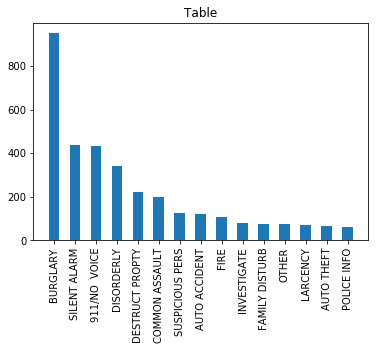

In [73]:
df1 = getTimeFrame(data, "4/28/2015", "4/29/2015")
# df2 = df1.loc[df1["priority"] == "High"]
createHistogram(df1,"description", maxNum=15)

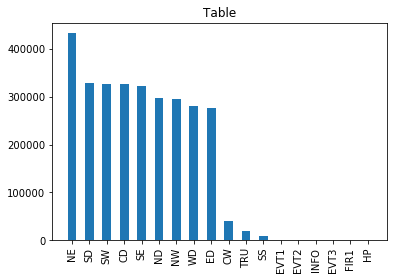

In [74]:
createHistogram(data, "district", sortByNum=True)

In [75]:
def winkeltripel(lon, lat):
    central =  math.radians(-98)
    phi_1 = math.acos(2 / math.pi)
    #phi_1 = 0
    alpha = math.acos(math.cos(lat) * math.cos((lon - central)/ 2))
    x = 0.5 * (lon * math.cos(phi_1) + 
               (2 * math.cos(lat) * math.sin((lon - central) / 2)) / 
               (math.sin(alpha) / alpha))
    y = 0.5 * (lat + math.sin(lat) / (math.sin(alpha) / alpha))
    return x, y

In [77]:
import shapefile as shp

ModuleNotFoundError: No module named 'shapefile'